# Lab 3

In [1]:
#Print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

A file of data often has a predictable structure in which every line has the same format, for example:
```
Last,First,Year
Patel,Anvita,2020
Ngozi-Adichie,Chimamanda,2021
Smith,Rob,2019
```
Sometimes, though, you have to make sense of unstructured or semi-structured text in which there is either no format at all (like the posts people write on Facebook or Reddit), or a loose format with a lot of variability to it (like the log data you are going to analyze in this assignment).

This lab will give you practice using regular expressions to extract useful data from semi-structured text. The text comes from the log file of a real Amazon Alexa application that consisted of several custom "skills" that a user could ask Alexa to perform.

An application often creates a "log file" (or simply, a "log") to record what is happening while the application runs. In your own code, you have probably used the print() function to help you understand what your program was doing. If you had put that printed output in a file, that would have been a "log."

Sometimes a log records errors that have occurred. Other times, it records something about how the code is behaving, e.g., "calling function xyz() with argument=7," or "returning True from function abc()." What is logged is up to the programmers; often, the contents of a log file are somewhat freeform with only a little structure or pattern to them.

Download the _alexalog.txt_ file from Canvas and open it in JupyterLab. The file consists of messages that were written to the log every time a user made a request to Alexa (that is, to the Echo device in the room). Some messages were logged by the programmers who wrote the custom Alexa skills, others were logged by Amazon. Many lines have a pattern to them, but you'll see that all lines don't look the same. For any one conversation with Alexa, there are many consecutive lines in the log. Do you see how they can be grouped?

This lab asks you to write code that will read _alexalog.txt_ and use regular expression techniques to answer questions about the data.

For each question below, your code should determine the answer and print it. The exact format of what you print is up to you; some suggested output formats are shown below.

**Important Notes**
* **_You have to write code. Don't just look at the file to answer the questions!_**
* The regex to match a tab is `\t`.
* You will not have to read in more than one line at a time to answer any of the questions below.
* Write your code in the code cell at the end of this notebook. If you want to add more code cells, go ahead. Put a Python comment at the top of every code cell you create so we know the purpose of that cell.
* **Clean Up!** Delete any code cells you are not using. Do not litter the notebook with abandoned code cells you're not using any more. If you try something and decide not to use it, _delete that cell_.
* **Write regexes incrementally**.  If your regular expression is complicated, write part of it and test to make sure that that part is being matched correctly, and then add to it.
* There is a single code cell given for your answer.  This is because you should loop through each line of the text only once--as you do, you should update some data structure for each step that stores the data you need.  Then after you have looped through all lines (and closed the file) you can print the information stored in each data structure.  **But!** you can write the code for each step one at a time.

In [2]:
#Print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

## Step 1

Associated with each user request is a summary of the resources used by that request. What is the total _Billed Duration_ time for all requests in the log file (in milliseconds)? The _Billed Duration_ is labeled in the file with those exact words, for example:

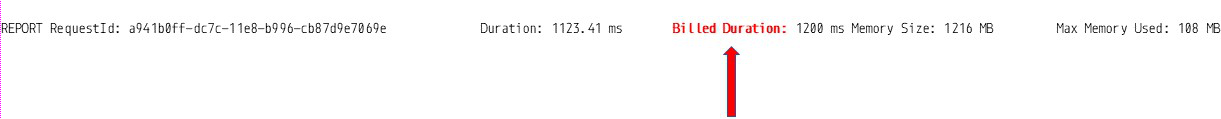

#### Suggested Output Format
```Total Billed Duration (in milliseconds): nnnnn```

## Step 2
How many **distinct** userId's are represented in the file? What are they? The sample below shows where to find a userId; just take the part after amzn1.ask.account. **It isn't always amzn1 -- there might be a different digit!** (In the sample, the userId has been shortened a lot so the text fits on screen better; the userIDs in the file are loooooong.)

#### Sample text from log
```START RequestId: a941b0ff-dc7c-11e8-b996-cb87d9e7069e Version: $LATEST
2018-10-30T19:47:42.758Z a941b0ff-dc7c-11e8-b996-cb87d9e7069e Warning: Application ID is not set
2018-10-30T19:47:42.848Z a941b0ff-dc7c-11e8-b996-cb87d9e7069e *** userId: amzn1.ask.account.AGXQX4DMVWSHRO...
                                                                  ^^^^^^                    ^^^^^^^^^^^^^^...
```
#### Suggested Output Format
```
There are nnn different userId's. They are:
AGXQX4DMVWSHRO
ABCD8675309EFG
LALA3456DA983Q
```

## Step 3
Every time a user spoke a request to Alexa, a particular function was called in the custom code written by the programmers. That function was _readTab_; its purpose is to read the contents of a particular tab (page) from a Google Sheet. For each request, list:
* which tabs were read by that request
* whether reading each tab succeeded or failed
You must store the key results in a data structure, and then print from the data structure.

#### Suggested Output Format
```
Request a941b0ff-dc7c-11e8-b996-cb87d9e7069e:
Read tab Schedule (Success)
Read tab QuizQuestions (Success)

Request e0b42e37-dc7c-11e8-be00-7be328297a83:
  Read tab Schedule (Success)
  Read tab FastFacts (Failure)
```

## What to Submit
1. Save the JupyterLab notebook you have been working in. The filename doesn't matter. 
2. Submit the notebook file through Canvas.
3. Everyone in a group should submit a file; one will randomly be chosen to be graded.

### Write your code in the cell below. Put a Python comment indicating the step number before each step in your code.

In [22]:
##Calculating the total billed duration
f = open("alexalog.txt", "r")
import re
regex = "([1-9]\d*) ms Memory Size"
billed_duration = []
total_billed_duration = 0 
regex_c = re.compile(regex)
for line in f:
    if regex_c.findall(line):
        for line in regex_c.findall(line):
            billed_duration+=[line]
            total_billed_duration+=int(line)
        
billed_duration
total_billed_duration
print(f'Total Billed Duration(in milliseconds): {total_billed_duration}')
f.close()

['1200',
 '1200',
 '1100',
 '1000',
 '1000',
 '100',
 '900',
 '100',
 '100',
 '100',
 '1000',
 '1800',
 '1700',
 '100',
 '1100',
 '1300',
 '1200',
 '1200',
 '1100',
 '900',
 '1300',
 '1000',
 '1300',
 '3800',
 '100']

25700

Total Billed Duration(in milliseconds): 25700


In [27]:
##Calculating the number of User Ids
f = open("alexalog.txt", "r")
import re
regex= "userId: amzn\d+\.ask\.account\.([A-Z\d]+)"
regex_c = re.compile(regex)
user_id = []
count = 0
for line in f:
    if regex_c.findall(line):
        for line in regex_c.findall(line):
             if line not in user_id:
                user_id+=[line]
                count+=1

count

print(f"There are {count} different userId's. They are:")
print(user_id)
f.close()

3

There are 3 different userId's. They are:
['AGXQX4DMVWSHROW2V7ZVQT34POHHJTA6A4ZVUE7N6R4ISBVRMB67REKQGNIJN3B2NB4S5XFGNFW2M723QOONGWKRX2H4O554P5K26IGWU73J6W3ZH2JWZMY67L7GWQPUSLCFF4FXG7CPFKOAWRIQICNKPCICGK3XVHLHSY7IEGYWLB4HRJJCISBV4Q6MY6IPZ2A7W6BA53QZSAA', 'AGZ2JHFTLFEJZFGV3VJHPCJGDYECYMVRXBIPJ3CFHF3I3H5PFKVLWTMERQDMCFCBEYZYMMBOPJSOG2VSUTFBI7KUL2XQYZC5SF6ZZ2NRRGLZRFG3QWMZPEEBWANWKZBZBPSYCHZ3YV4JRCFOOX27OKL2AMAUT3AJM2IV5UGIGTSZKYB2KKNF473F2CJMDCWWCD7JSI6X3RWTUCQ', 'AFUZ7MBOG33QL6E53OKL62XCL5YBKRVFBOW62QPROKIKYKUJYB2DHRNOAJZVJCXKT2G356QAJC4ZM5WEXAD2FTC54DBNSFVNTDHN4SYCXROGWVSC4HKNMYPYRUXSXYQINRVFLHVTFCYVVKZZ2TWSXIW7KOACENDEM5EMN3MYEUANKFB5KVYNH4UK3K7Q7HNY2SBWZJ4WNXUIYNA']


In [ ]:
##Printing the tabs read by each request, along with the status of each tab

f= open("alexalog.txt","r")
import re
regex_id= re.compile("\t(\w+\-\w+\-\w+\-\w+\-\w+)\treadTab starting \(Schedule\)")
regex_tab= re.compile("\((\w*)\)")
regex_status = re.compile("Success|Failure")

for line in f:
    if regex_id.findall(line):
        for line in regex_id.findall(line):
            print(f'Requests {line}:')
    if regex_tab.findall(line):
        for line in regex_tab.findall(line):
                x= line
    if regex_status.findall(line):
        for line in regex_status.findall(line):
            print(f'Read tab {x} ({line})')